<center><h1><font color='darkblue'>Elektrotehnički fakultet Beograd</font></h1></center>

# PROJEKTNI ZADATAK IZ DINAMIKE MEHANIČKIH SISTEMA, školska 2025/26 godina

## Lazar Miovčić 24/0246
## Mihailo Bogdanić 24/0304

### 1. Funkcije veze

Ograničenja sistema su definisana rotacijom žice konstantnom ugaonom brzinom i njenim paraboličnim oblikom:

$$ f_1 = \theta - \omega t = 0 $$
$$ f_2 = z - b r^2 = 0 $$

### 2. Lagranž-Ojlerove jednačine

Lagranžijan sistema je $L = \frac{1}{2}m(\dot{r}^2 + r^2\dot{\theta}^2 + \dot{z}^2) - mgz$.
Parcijalni izvodi funkcija veze su:
$$ \frac{\partial f_2}{\partial r} = -2br, \quad \frac{\partial f_1}{\partial \theta} = 1, \quad \frac{\partial f_2}{\partial z} = 1 $$
Ostali parcijalni izvodi funkcija veze su nula.

**Jednačina za koordinatu $r$:**
$$ \frac{\partial L}{\partial r} + \lambda_1 \frac{\partial f_1}{\partial r} + \lambda_2 \frac{\partial f_2}{\partial r} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{r}}\right) = 0 $$
$$ mr\dot{\theta}^2 + \lambda_2(-2br) - m\ddot{r} = 0 $$
Sređivanjem dobijamo prvu jednačinu sistema:
$$ m\ddot{r} + 2br\lambda_2 = mr\dot{\theta}^2 $$

**Jednačina za koordinatu $\theta$:**
$$ \frac{\partial L}{\partial \theta} + \lambda_1 \frac{\partial f_1}{\partial \theta} + \lambda_2 \frac{\partial f_2}{\partial \theta} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}}\right) = 0 $$
$$ 0 + \lambda_1(1) - \frac{d}{dt}(mr^2\dot{\theta}) = 0 $$
$$ \lambda_1 - (mr^2\ddot{\theta} + 2mr\dot{r}\dot{\theta}) = 0 $$
Sređivanjem dobijamo drugu jednačinu sistema:
$$ mr^2\ddot{\theta} - \lambda_1 = -2mr\dot{r}\dot{\theta} $$

**Jednačina za koordinatu $z$:**
$$ \frac{\partial L}{\partial z} + \lambda_1 \frac{\partial f_1}{\partial z} + \lambda_2 \frac{\partial f_2}{\partial z} - \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{z}}\right) = 0 $$
$$ -mg + \lambda_2(1) - m\ddot{z} = 0 $$
Sređivanjem dobijamo treću jednačinu sistema:
$$ m\ddot{z} - \lambda_2 = -mg $$

### 3. Diferencijalne jednačine ograničenja (CSM metod)

Primjenom metode stabilizacije ograničenja (Constraint Stabilization Method) na funkcije $f_1$ i $f_2$:
$$ \ddot{f} + 2\xi\dot{f} + \xi^2 f = 0 $$

Za $f_1 = \theta - \omega t$:
$$ \ddot{\theta} + 2\xi(\dot{\theta} - \omega) + \xi^2(\theta - \omega t) = 0 $$

Za $f_2 = z - b r^2$:
Diferenciranjem dobijamo $\dot{f}_2 = \dot{z} - 2br\dot{r}$ i $\ddot{f}_2 = \ddot{z} - 2b(\dot{r}^2 + r\ddot{r})$.
Uvrštavanjem u CSM jednačinu:
$$ (\ddot{z} - 2br\ddot{r} - 2b\dot{r}^2) + 2\xi(\dot{z} - 2br\dot{r}) + \xi^2(z - br^2) = 0 $$
$$ -2br\ddot{r} + \ddot{z} = 2b\dot{r}^2 - 2\xi(\dot{z} - 2br\dot{r}) - \xi^2(z - br^2) $$

### 4. Sistem jednačina u matričnom obliku

Kombinovanjem tri dinamičke jednačine i dvije jednačine ograničenja, dobijamo sistem:

$$
\begin{bmatrix}
m & 0 & 0 & 0 & 2br \\
0 & mr^2 & 0 & -1 & 0 \\
0 & 0 & m & 0 & -1 \\
0 & 1 & 0 & 0 & 0 \\
-2br & 0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
\ddot{r} \\
\ddot{\theta} \\
\ddot{z} \\
\lambda_1 \\
\lambda_2
\end{bmatrix}
=
\begin{bmatrix}
mr\dot{\theta}^2 \\
-2mr\dot{r}\dot{\theta} \\
-mg \\
-2\xi(\dot{\theta} - \omega) - \xi^2(\theta - \omega t) \\
2b\dot{r}^2 - 2\xi(\dot{z} - 2br\dot{r}) - \xi^2(z - br^2)
\end{bmatrix}
$$

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


def sistem_jednacina(y, t, m, b, omega, xi, g):
    r, vr, theta, vtheta, z, vz = y

    # Matrica sistema A (5x5)
    # Redoslijed nepoznatih: X = [ar, atheta, az, lambda1, lambda2]
    A = np.array([
        [m, 0, 0, 0, 2*b*r],       # Jednacina za r
        [0, m*r**2, 0, -1, 0],     # Jednacina za theta
        [0, 0, m, 0, -1],          # Jednacina za z
        [0, 1, 0, 0, 0],           # CSM Ogranicenje 1 (theta)
        [-2*b*r, 0, 1, 0, 0]       # CSM Ogranicenje 2 (z)
    ])

    # Vektor B
    # Stabilizacija za theta
    stab_theta = -2*xi*(vtheta - omega) - xi**2*(theta - omega*t)
    # Stabilizacija za z
    stab_z = 2*b*vr**2 - 2*xi*(vz - 2*b*r*vr) - xi**2*(z - b*r**2)

    B = np.array([
        m * r * vtheta**2,         # Desna strana r
        -2 * m * r * vr * vtheta,  # Desna strana theta
        -m * g,                    # Desna strana z
        stab_theta,                # Desna strana CSM theta
        stab_z                     # Desna strana CSM z
    ])

    X = np.linalg.solve(A, B)

    ar, atheta, az = X[0], X[1], X[2]
    return [vr, ar, vtheta, atheta, vz, az]

In [73]:
# Parametri sistema
m = 1.0       # Masa (kg)
b = 1.0       # Parametar parabole (m^-1)
omega = 2.0   # Ugaona brzina (rad/s)
xi = 10.0     # Faktor stabilizacije ksi
g = 9.81      # Gravitacija (m/s^2)

# Vremenska osa
t = np.linspace(0, 5, 1000)

# Pocetni uslovi
r0 = 0.5                  # Pocetni poluprecnik (m)
theta0 = 0.0              # Pocetni ugao (rad)
z0 = b * r0**2            # z mora biti na paraboli: z = b*r^2

vr0 = 0.0                 # Pocetna radijalna brzina
vtheta0 = omega           # Ugaona brzina mora biti omega
vz0 = 2 * b * r0 * vr0    # Izvod z = b*r^2 -> vz = 2*b*r*vr (ovde 0)

y0 = [r0, vr0, theta0, vtheta0, z0, vz0]

# Rjesavanje diferencijalnih jednacina
sol = odeint(sistem_jednacina, y0, t, args=(m, b, omega, xi, g))

# Raspakivanje rjesenja
r = sol[:, 0]
vr = sol[:, 1]
theta = sol[:, 2]
vtheta = sol[:, 3]
z = sol[:, 4]
vz = sol[:, 5]



In [74]:
# RACUNANJE SILA

lambda1_arr = []
lambda2_arr = []

# Prolazimo kroz svaki vremenski trenutak da rekonstruisemo sile
for i in range(len(t)):
    # Trenutne vrijednosti
    r_i, vr_i = r[i], vr[i]
    theta_i, vtheta_i = theta[i], vtheta[i]
    z_i, vz_i = z[i], vz[i]
    t_i = t[i]

    A = np.array([
        [m, 0, 0, 0, 2*b*r_i],
        [0, m*r_i**2, 0, -1, 0],
        [0, 0, m, 0, -1],
        [0, 1, 0, 0, 0],
        [-2*b*r_i, 0, 1, 0, 0]
    ])

    stab_theta = -2*xi*(vtheta_i - omega) - xi**2*(theta_i - omega*t_i)
    stab_z = 2*b*vr_i**2 - 2*xi*(vz_i - 2*b*r_i*vr_i) - xi**2*(z_i - b*r_i**2)

    B = np.array([
        m * r_i * vtheta_i**2,
        -2 * m * r_i * vr_i * vtheta_i,
        -m * g,
        stab_theta,
        stab_z
    ])

    X = np.linalg.solve(A, B)
    lambda1_arr.append(X[3])
    lambda2_arr.append(X[4])


lambda1 = np.array(lambda1_arr)
lambda2 = np.array(lambda2_arr)

# Racunanje sila ogranicenja
# F_theta = lambda1 * (df1/dtheta) = lambda1 * 1
F_theta = lambda1 * 1

# F_r = lambda2 * (df2/dr) = lambda2 * (-2br)
F_r = lambda2 * (-2 * b * r)

# F_r = lambda2 * (df2/dz) = lambda2 * 1
F_z = lambda2 * 1

# Ukupna sila reakcije zice
N = np.sqrt(F_r**2 + F_z**2)

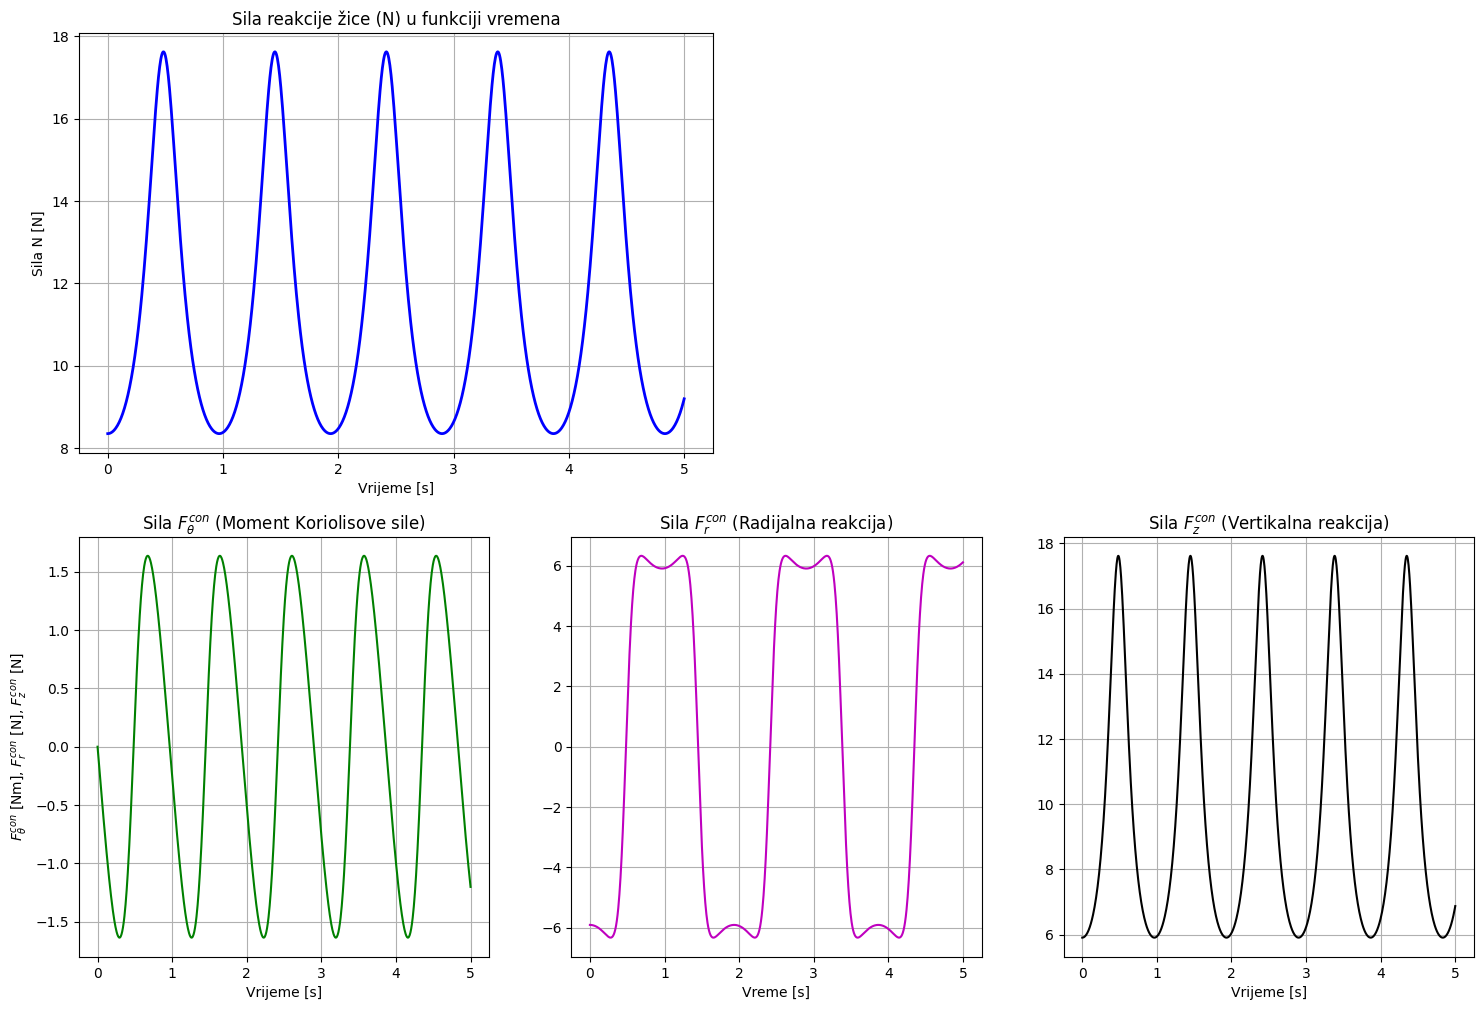

In [79]:
# CRTANJE GRAFIKA

plt.figure(figsize=(18, 12))

# Sila reakcije N u funkciji vremena
plt.subplot(2, 2, 1)
plt.plot(t, N, 'b-', linewidth=2)
plt.title('Sila reakcije žice (N) u funkciji vremena')
plt.xlabel('Vrijeme [s]')
plt.ylabel('Sila N [N]')
plt.grid(True)

# Komponente sila (F_theta, F_r, F_z)
plt.subplot(2, 3, 4)
plt.plot(t, F_theta, 'g-')
plt.title(r'Sila $F_{\theta}^{con}$ (Moment Koriolisove sile)')
plt.xlabel('Vrijeme [s]')
plt.ylabel(r'$F_{\theta}^{con}$ [Nm], $F_{r}^{con}$ [N], $F_z^{con}$ [N]')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(t, F_r, 'm-')
plt.title('Sila $F_{r}^{con}$ (Radijalna reakcija)')
plt.xlabel('Vrijeme [s]')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(t, F_z, 'k-')
plt.title('Sila $F_z^{con}$ (Vertikalna reakcija)')
plt.xlabel('Vrijeme [s]')
plt.grid(True)

# plt.tight_layout()
plt.show()

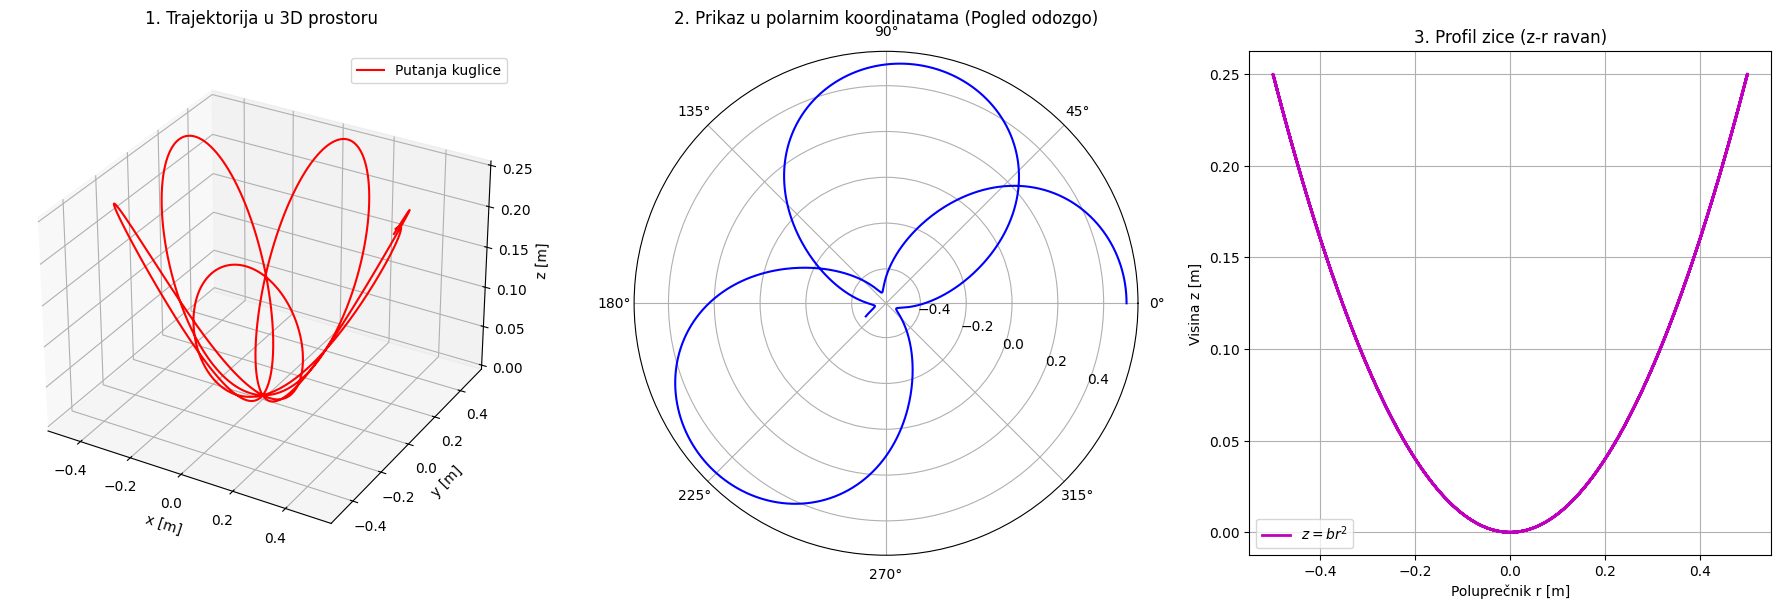

In [76]:
fig = plt.figure(figsize=(18, 6))


# 3D Trajektorija
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

# Konverzija u Dekartove koordinate
x_vals = r * np.cos(theta)
y_vals = r * np.sin(theta)

ax1.plot(x_vals, y_vals, z, 'r-', linewidth=1.5, label='Putanja kuglice')
ax1.set_title('1. Trajektorija u 3D prostoru', fontsize=12, pad=20)
ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.set_zlabel('z [m]')
ax1.legend()


# Polarni koord. sistem
ax2 = fig.add_subplot(1, 3, 2, projection='polar')
# Polar plot ocekuje (ugao, radijus)
ax2.plot(theta, r, 'b-', linewidth=1.5)
ax2.set_title('2. Prikaz u polarnim koordinatama (Pogled odozgo)', fontsize=12, pad=20)
ax2.set_rlabel_position(-22.5)
ax2.grid(True)


# Parabola (z u zavisnosti od r)
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(r, z, 'm-', linewidth=2, label='$z = br^2$')
ax3.set_title('3. Profil zice (z-r ravan)', fontsize=12)
ax3.set_xlabel('Poluprečnik r [m]')
ax3.set_ylabel('Visina z [m]')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

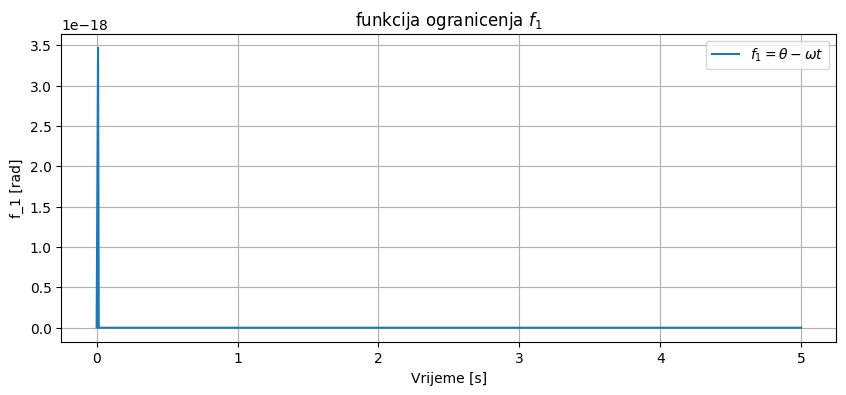

In [77]:
# Grafik funkcije f_1
plt.figure(figsize=(10, 4))
plt.plot(t, theta - omega * t , label=r'$f_1 = \theta - \omega t$')
plt.title('funkcija ogranicenja $f_1$')
plt.xlabel('Vrijeme [s]')
plt.ylabel('f_1 [rad]')
plt.legend()
plt.grid(True)
plt.show()

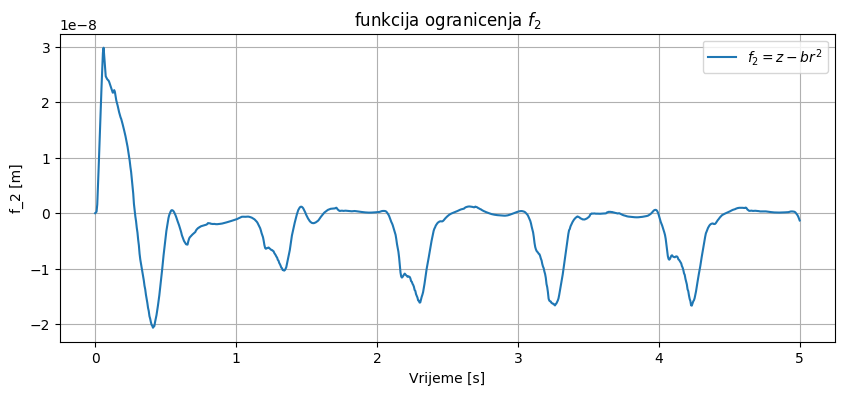

In [78]:
# Grafik funkcije f_2
plt.figure(figsize=(10, 4))
plt.plot(t, z - b*r**2, label='$f_2 = z - br^2$')
plt.title('funkcija ogranicenja $f_2$')
plt.xlabel('Vrijeme [s]')
plt.ylabel('f_2 [m]')
plt.legend()
plt.grid(True)
plt.show()

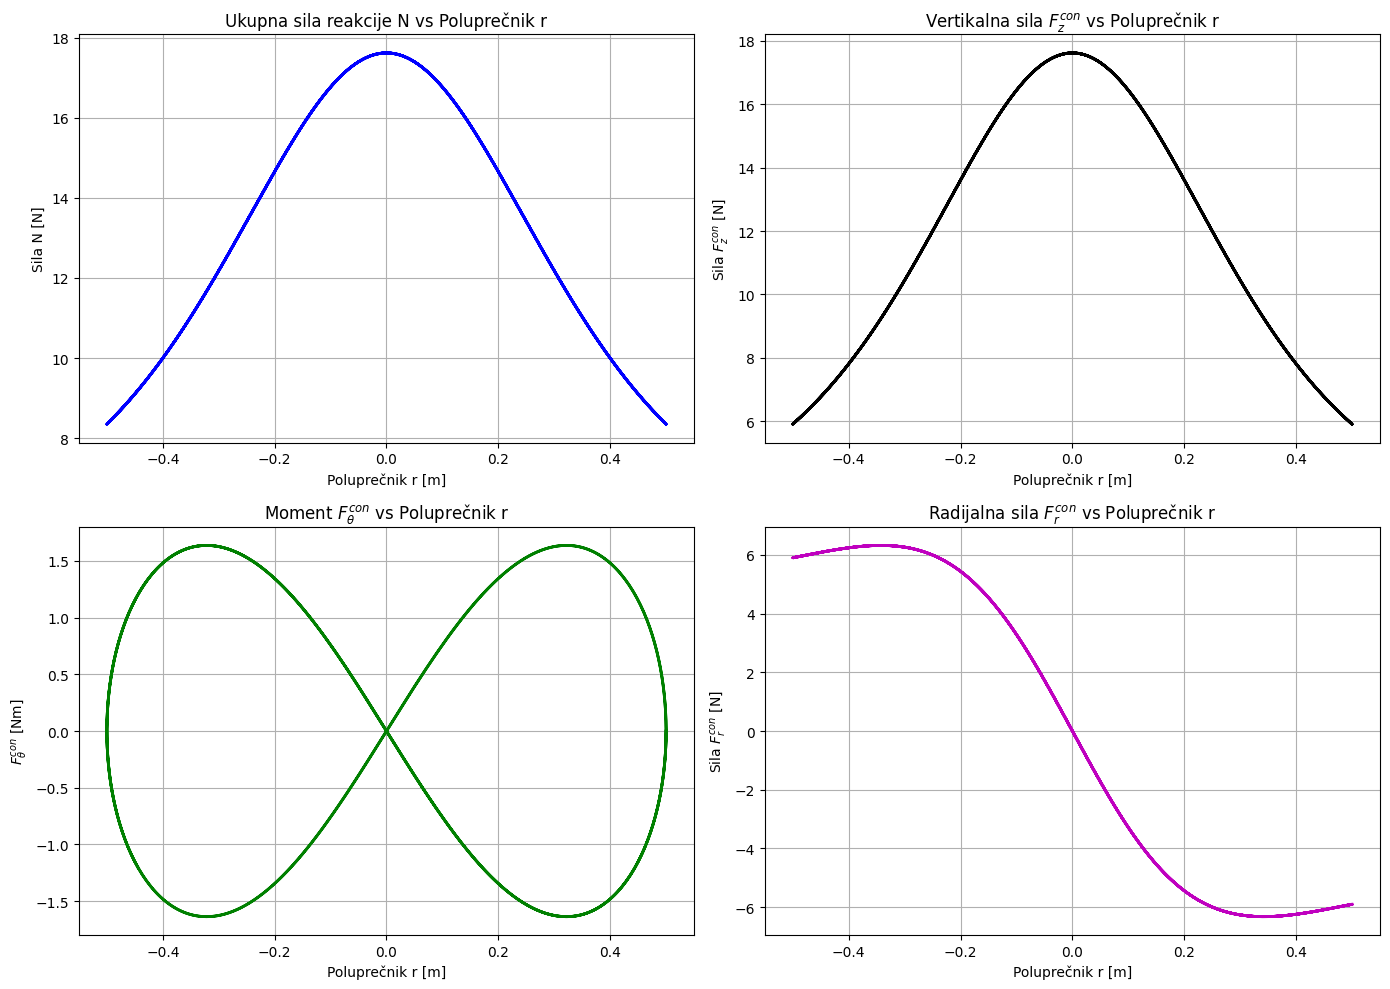

In [88]:
plt.figure(figsize=(14, 10))

# 1. Ukupna sila reakcije N u zavisnosti od r
plt.subplot(2, 2, 1)
plt.plot(r, N, 'b-', linewidth=2)
plt.title('Ukupna sila reakcije N vs Poluprečnik r', fontsize=12)
plt.xlabel('Poluprečnik r [m]')
plt.ylabel('Sila N [N]')
plt.grid(True)

# 2. Vertikalna komponenta F_z u zavisnosti od r
plt.subplot(2, 2, 2)
plt.plot(r, F_z, 'k-', linewidth=2)
plt.title('Vertikalna sila $F_{z}^{con}$ vs Poluprečnik r', fontsize=12)
plt.xlabel('Poluprečnik r [m]')
plt.ylabel('Sila $F_{z}^{con}$ [N]')
plt.grid(True)

# 3. Moment Koriolisove sile F_theta u zavisnosti od r
plt.subplot(2, 2, 3)
plt.plot(r, F_theta, 'g-', linewidth=2)
plt.title(r'Moment $F_{\theta}^{con}$ vs Poluprečnik r', fontsize=12)
plt.xlabel('Poluprečnik r [m]')
plt.ylabel(r'$F_{\theta}^{con}$ [Nm]')
plt.grid(True)

# 4. Radijalna sila F_r u zavisnosti od r
plt.subplot(2, 2, 4)
plt.plot(r, F_r, 'm-', linewidth=2)
plt.title('Radijalna sila $F_{r}^{con}$ vs Poluprečnik r', fontsize=12)
plt.xlabel('Poluprečnik r [m]')
plt.ylabel('Sila $F_{r}^{con}$ [N]')
plt.grid(True)

plt.tight_layout()
plt.show()